# Kernel Ridge Regression
This notebook takes the full data scaled to zero mean and unit variance and the PCA reduced data and trains a Kernel Ridge Regressor for both datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pca_data = np.load("../data/X_pca.npy")
scaled_data = np.load("../data/X_scaled.npy")
Y = np.load("../data/y.npy")

In [3]:
train_size = 8000

pca_train = pca_data[:train_size, :]
pca_val = pca_data[train_size:, :]
scaled_train = scaled_data[:train_size, :]
scaled_val = scaled_data[train_size:, :]
y_train = Y[:train_size]
y_val = Y[train_size:]

### Create RBF kernel function
Utillizes the fact that $(x-x')^2=||x||^2+||x'||^2-2x^Tx'$, 
https://www.youtube.com/watch?v=nJz_lazAUqw

In [4]:
def rbf_kernel(x1, x2, gamma):
    x1_sq = np.sum(x1**2, axis=1).reshape(-1, 1)
    x2_sq = np.sum(x2**2, axis=1).reshape(1, -1)
    return np.exp(-gamma * (x1_sq + x2_sq - 2*x1@x2.T))


def train_rbf(x, y, gamma, lambd):
    K = rbf_kernel(x, x, gamma)
    n = K.shape[0]
    alpha = np.linalg.solve(K + lambd * np.eye(n), y)
    return alpha


def predict_rbf(x, z, alpha, gamma):
    k = rbf_kernel(x, z, gamma)
    return k.T @ alpha


In [5]:
best_gamma = None
best_lambda = None
best_MAE = np.inf
gamma_values = [0.01, 0.1, 1, 10]
lambda_values = [1e-3, 1e-2, 1e-1, 1]
for gamma in gamma_values:
    for lambd in lambda_values:
        alpha = train_rbf(scaled_train, y_train, gamma, lambd)
        predictions = predict_rbf(scaled_train, scaled_val, alpha, gamma)
        mean_error = np.sum(np.abs(y_val - predictions))/ len(y_val)
        if mean_error < best_MAE:
            best_gamma = gamma
            best_lambda = lambd
            best_MAE = mean_error

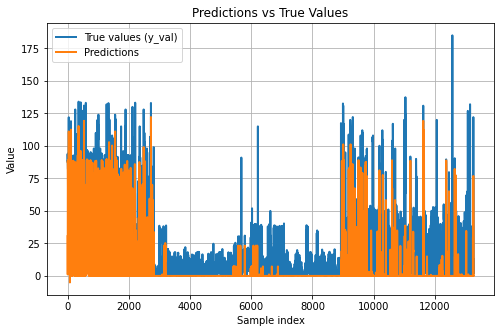

The absolute mean error is: 9.857950057617696


In [6]:
def plot_predictions(y_val, y_pred):
    plt.figure(figsize=(8, 5))

    # Plot true values
    plt.plot(y_val, label="True values (y_val)", linewidth=2)

    # Plot predictions
    plt.plot(y_pred, label="Predictions", linewidth=2)

    plt.xlabel("Sample index")
    plt.ylabel("Value")
    plt.title("Predictions vs True Values")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_val, predictions)
print("The absolute mean error is:", best_MAE)

### Linear Regression with L2 regularization

In [7]:
def linear_regression_weight(x, y, lambd):
    n = x.shape[1]
    w = np.linalg.solve(x.T@x+lambd*np.eye(n), x.T@y)
    return w
def linear_regression(z, w):
    return z@w

In [8]:
lambda_values = [1e-3, 1e-2, 1e-1, 1]
best_lambda = None
best = np.inf
for lambd in lambda_values:
    w = (linear_regression_weight(scaled_train, y_train, lambd))
    predictions = linear_regression(scaled_val, w)
    score = np.sum(np.abs(y_val - predictions))/ len(y_val)
    if score < best:
        best = score
        best_lambda = lambd

print("The absolute mean error is:", best)

The absolute mean error is: 67.86635224806442


### Create polynomial kernel function

In [13]:
def train_krr(x, y, kernel, lambd):
    K = kernel(x, x)
    n = K.shape[0]
    return np.linalg.solve(K + lambd * np.eye(n), y)

def predict_krr(x_train, x_test, alpha, kernel):
    K = kernel(x_train, x_test)
    return K.T @ alpha

2 0.1 0.0 0.01 306.35414775628504
2 0.1 0.0 0.1 184.49999364119037
2 0.1 0.0 1 111.36731262251513
2 0.1 1.0 0.01 379.6966033313668
2 0.1 1.0 0.1 238.95364135879876
2 0.1 1.0 1 111.28886994218861
2 1 0.0 0.01 1187.5357990041193
2 1 0.0 0.1 518.0433485922048
2 1 0.0 1 306.3541477590036
2 1 1.0 0.01 1301.1251636006452
2 1 1.0 0.1 551.6465880599376
2 1 1.0 1 366.72599383632905
3 0.1 0.0 0.01 692.861287752057
3 0.1 0.0 0.1 355.5195654957935
3 0.1 0.0 1 212.68632183653904
3 0.1 1.0 0.01 724.238444438606
3 0.1 1.0 0.1 310.4801018772747
3 0.1 1.0 1 174.50232292136135
3 1 0.0 0.01 11003.664265778274
3 1 0.0 0.1 4007.8727598239293
3 1 0.0 1 1588.586565500092
3 1 1.0 0.01 9727.89695820836
3 1 1.0 0.1 3629.4844907402676
3 1 1.0 1 1492.650173528877
4 0.1 0.0 0.01 2121.5427737876153
4 0.1 0.0 0.1 925.2656781318569
4 0.1 0.0 1 404.57042027416253
4 0.1 1.0 0.01 1274.1940661121214
4 0.1 1.0 0.1 545.0896085921754
4 0.1 1.0 1 222.32458068586476
4 1 0.0 0.01 58645.44932696652
4 1 0.0 0.1 27073.99630668416

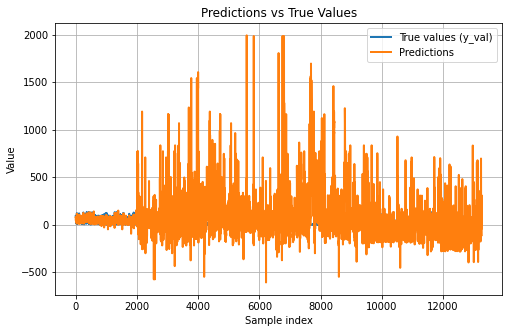

Best degree: 2
Best gamma: 0.1
Best coef0: 1.0
Best lambda: 1
The absolute mean error is: 111.28886994218861


In [ ]:
import sys
sys.path.append("..")
from src.kernels.polynomial import PolynomialKernel

best_degree = None
best_gamma = None
best_coef0 = None
best_lambda = None
best_MAE = np.inf
best_predictions = None

degree_values = [2, 3, 4]
gamma_values = [0.1, 1]
coef0_values = [0.0, 1.0]
lambda_values = [1e-2, 1e-1, 1]

for degree in degree_values:
    for gamma in gamma_values:
        for coef0 in coef0_values:
            kernel = PolynomialKernel(degree=degree, gamma=gamma, coef0=coef0)
            for lambd in lambda_values:
                try:
                    alpha = train_krr(scaled_train, y_train, kernel, lambd)
                except np.linalg.LinAlgError:
                    n = scaled_train.shape[0]
                    K = kernel(scaled_train, scaled_train)
                    alpha = np.linalg.solve(K + (lambd + 1e-8) * np.eye(n), y_train)

                preds = predict_krr(scaled_train, scaled_val, alpha, kernel)
                mae = np.mean(np.abs(y_val - preds))

                if mae < best_MAE:
                    best_degree = degree
                    best_gamma = gamma
                    best_coef0 = coef0
                    best_lambda = lambd
                    best_MAE = mae
                    best_predictions = preds

plot_predictions(y_val, best_predictions)
print("Best degree:", best_degree)
print("Best gamma:", best_gamma)
print("Best coef0:", best_coef0)
print("Best lambda:", best_lambda)
print("The absolute mean error is:", best_MAE)